<a href="https://colab.research.google.com/github/Avik-G/Detecting-Parkinson-s-Disease-using-XGBoost/blob/main/Detecting_Parkinson's_Disease_using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **What is Parkinson’s Disease?**
Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages to it and affects more than 1 million individuals every year in India. This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.

## **What is XGBoost?**
XGBoost is a new Machine Learning algorithm designed with speed and performance in mind. XGBoost stands for eXtreme Gradient Boosting and is based on decision trees. In this project, we will import the XGBClassifier from the xgboost library; this is an implementation of the scikit-learn API for XGBoost classification.

### **Objective**
To build a model to accurately detect the presence of Parkinson’s disease in an individual.

### **Libraries Used:**


*   Scikit-Learn
*   Numpy
*   Pandas
*   XGboost





*   **Importing necessary libraries**




In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
# Reading the data set
df = pd.read_csv('/content/drive/MyDrive/DS/Practice Projects/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [5]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

There are no Null Values in the data set.

<ipython-input-6-f2df4ee48eca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_map=df.corr()


<Axes: >

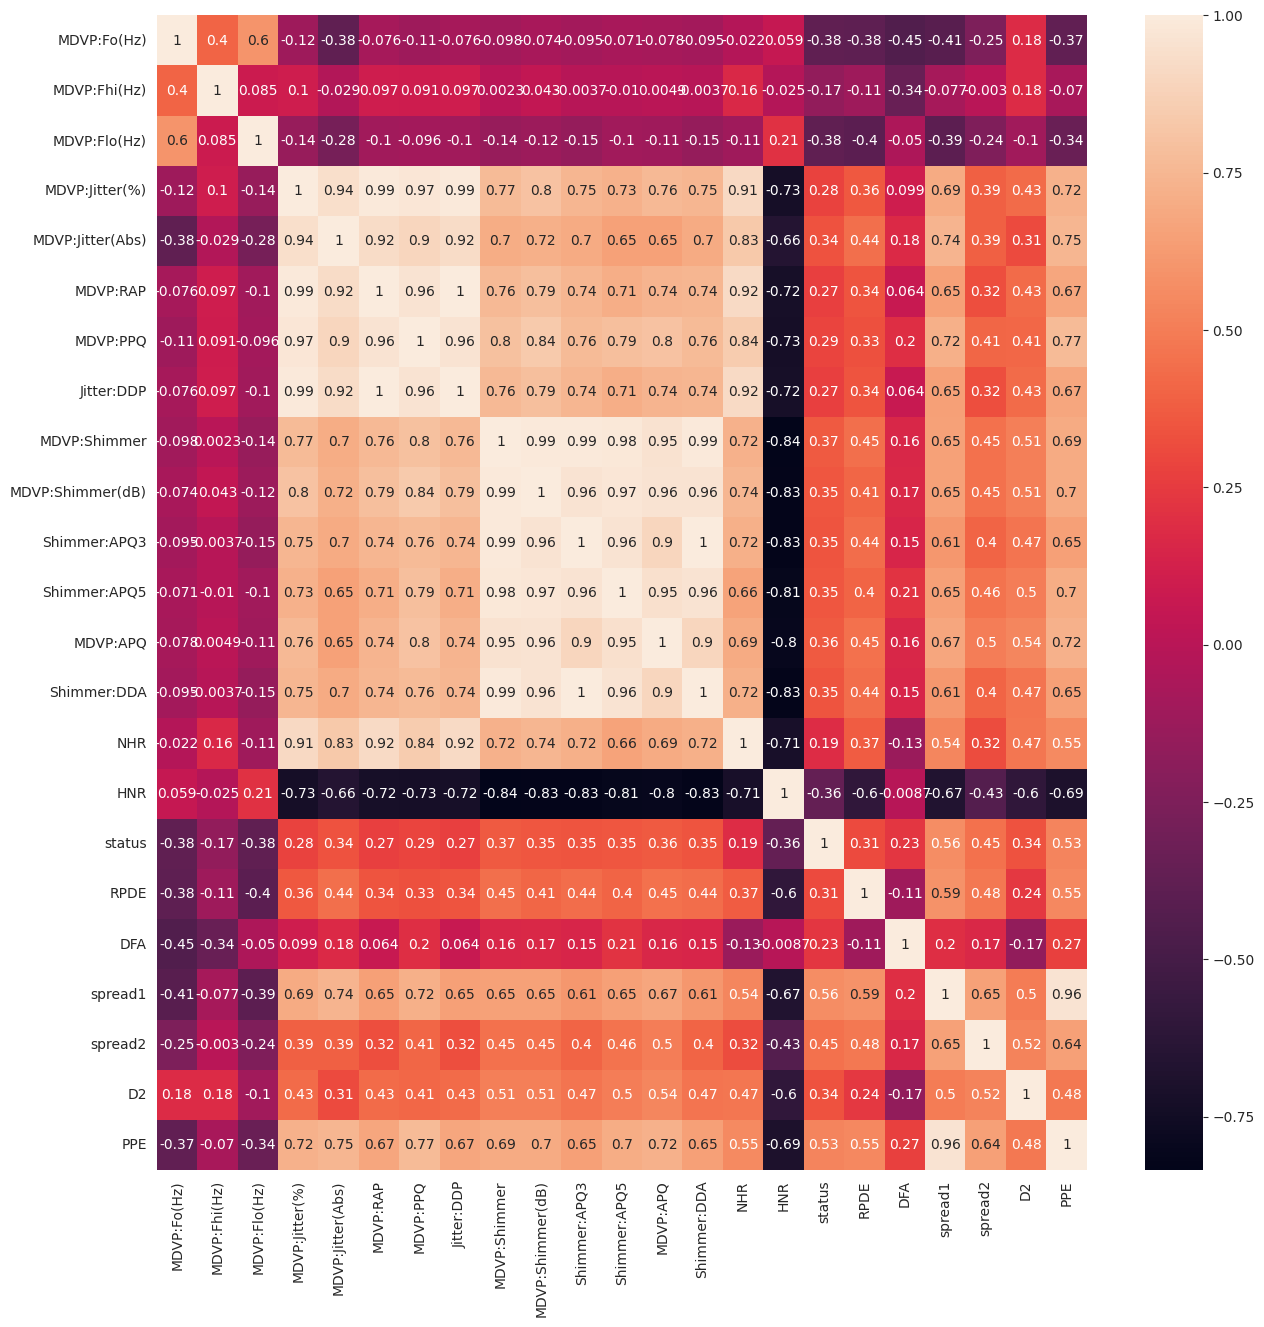

In [6]:
# Correlation-Heatmap
corr_map=df.corr()
sns.set_style('darkgrid') 
# sns.set_style help to set color of the axes, whether a grid is enabled by default, and other aesthetic elements.
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_map, annot=True)

In [7]:
# Correlation of target label status with each feature

correlation_values=df.corr()['status']
correlation_values.abs().sort_values(ascending=False)

<ipython-input-7-e9f6ba40cd3d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_values=df.corr()['status']


status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

In [8]:
# Extracting features & lables
# features are all columns except status & labels are values of status column
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [9]:
print('Count of 1 in Status =', labels[labels==1].shape[0])

Count of 1 in Status = 147


In [10]:
print('Count of 0 in Status =', labels[labels==0].shape[0] )

Count of 0 in Status = 48


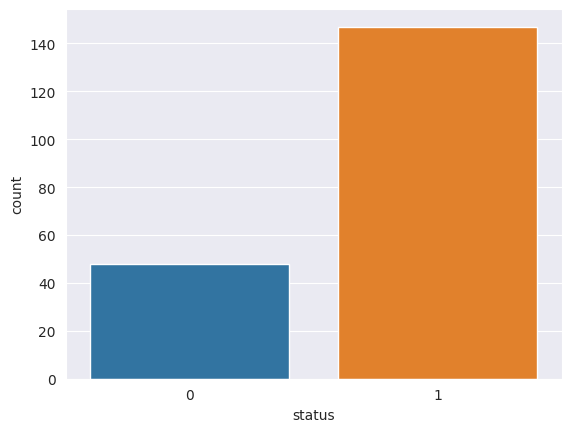

In [11]:
sns.countplot(x='status', data = df)
plt.show()

**Preprocessing our data with MinMax Scaler**
* MinMaxScaler() transforms features by scaling each feature to a given range.
* This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between (-1,1).
* So, we will first initialise our MinMaxSacler

In [12]:
# Scaling features between -1 and 1 to normalize them
scaler=MinMaxScaler((-1,1))

**Fit and Transform using MinMax Scaler**
* what fit_transform does is that performs the necessary calculation first and then do transformation on that data
* The basic formula for Min-Max scaling is how below:


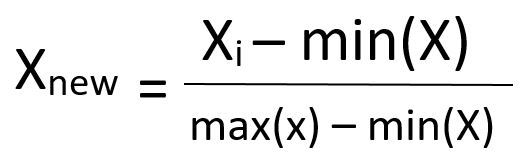

In [23]:
x=scaler.fit_transform(features)
y=labels


**Train Test Split**
* The train_test_split function is for splitting a single dataset for two different purposes: training and testing. 
* The testing subset is for building your model.
* The testing subset is for using the model on unknown data to evaluate the performance of the model
* Some important paramaters of train_test_split() are as follows:
> *X, y*: The first parameter is the dataset you're selecting to use.
> *test_size*: This parameter specifies the size of the testing dataset.
> *random_state*: To save the state of train_test_split so that the radnom split generated is same every time.

* We have distrbuted our data as follows:

 **train data**: 70% of total data

 **test_data**: 30% of total data

In [13]:
# Splitting data to Train & Test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 7)

In [14]:
x_train.shape

(156, 22)

In [15]:
x_test.shape

(39, 22)

In [16]:
y_train.shape

(156,)

In [17]:
y_test.shape

(39,)


### **We will be using XGBoost Classifier**
 **As necessary part, I will discuss some important parameters of XGBoost Classifier**
* booster [default=gbtree]
 - Select the type of model to run at each iteration. It has 2 options:
 1. gbtree: tree-based models
 2. gblinear: linear models
* silent [default=0]:
 - Silent mode is activated is set to 1, i.e. no running messages will be printed.
 - It’s generally good to keep it 0 as the messages might help in understanding the model.
* eta [default=0.3]

 - Analogous to learning rate in GBM
 - Makes the model more robust by shrinking the weights on each step
 - Typical final values to be used: 0.01-0.2
* min_child_weight [default=1]

 - Defines the minimum sum of weights of all observations required in a child.
 - This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
 - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
 - Too high values can lead to under-fitting hence, it should be tuned using CV.
* max_depth [default=6]

 - The maximum depth of a tree, same as GBM.
 - Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
 - Should be tuned using CV.
 - Typical values: 3-10
* max_leaf_nodes

 - The maximum number of terminal nodes or leaves in a tree.
 - Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
 - If this is defined, GBM will ignore max_depth.

gamma [default=0] - A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split. - Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned. - subsample [default=1] - Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree. - Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting. - Typical values: 0.5-1 - lambda [default=1] - L2 regularization term on weights (analogous to Ridge regression) - This used to handle the regularization part of XGBoost. Though many data scientists don’t use it often, it should be explored to reduce overfitting. - alpha [default=0] - L1 regularization term on weight (analogous to Lasso regression) Can be used in case of very high dimensionality so that the algorithm runs faster when implemented - scale_pos_weight [default=1] - A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.

**I have not provided any paramter to the XGBosot Classifier Model , I will be using the default values but you can try different values**


* We will initialize a XGBClassier model
* Train and fit our train data on the classfier with method :
>model_x.fit(x_train, y_train)

In [18]:
model_x = XGBClassifier()
model_x.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [19]:
y_pred = model_x.predict(x_test)

### **Performance of our classification model using confusion matix**
* In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix are highly dependable output matrix.
* A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known
* Its give summary of prediction results on a classification problem.
* The number of correct and incorrect predictions are summarized with count values and broken down by each class.
* This is the key to the confusion matrix.
* The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
* It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

                    Predicted Positive	Predicted Negative
      Actual Positive	True Positive	False Negative
      Actula Negative	False Positive	True Negative

* Sklearn's confusion matrix can be used as follow:
>confusion_matrix(y_true, y_pred)

In [21]:
print(confusion_matrix(y_test, y_pred))

[[ 6  1]
 [ 1 31]]


* **From our confusion matrix we can conclude that we have predict about 2 wrong prediction:**

 * 1 are False Negative
 * 1 is False Positve
* That mean our model has classified 1 patient as negative even when they were positive and 1 patient as positive even if they were negative.
* In Medical diagnosis we can deal with False Positives but we cannot use the results directly from a model that has higher number of False Negative at any cost.
* So, what we do is tune(improve) our model and always try reduce False Negative as much as possible which untimately increases the model accuarcy

 **Our classification model accuracy score**
* The most common metric for classification is accuracy, which is the fraction of samples predicted correctly
* Accuracy is the ratio of Total No. Correct prediction and Total No. of Predictions

In [22]:
print('Accurascy of Model: ', accuracy_score(y_test, y_pred)*100)

Accurascy of Model:  94.87179487179486


**Using XGBoost Classifier we have got about 94.87% which approximately 94.5% accuaracy**
 * We have got pretty good accuary on predicting our data